In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import InterclusterDistance
from sklearn.random_projection import SparseRandomProjection
from sklearn.model_selection import cross_val_score

from sklearn.mixture import GaussianMixture

from sklearn.tree import DecisionTreeClassifier
from scipy.stats import kurtosis
import math
from sklearn.metrics import silhouette_samples, silhouette_score, mean_squared_error, accuracy_score
import seaborn as sns



import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn import metrics

In [32]:
def splitData(dataX, dataY, percentage):
    dataXTrain, dataXTest, dataYTrain, dataYTest = train_test_split(
        dataX,dataY, test_size=percentage, random_state=0)
    return dataXTrain, dataXTest, dataYTrain, dataYTest


In [166]:
spamHeader = ['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet', 'order', 'mail', 
'receive', 'will', 'people', 'report', 'addresses', 'free', 'business', 'email', 'you', 
'credit', 'your', 'font', '000', 'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 
'telnet', '857', 'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct', 'cs', 
'meeting', 'original', 'project', 're', 'edu', 'table', 'conference', ';', '(', '[', '!', '$', '#', 'average', 'longest', 'total' , 'spam' ]

wine = pd.read_csv("data/wine/winequality-white.csv" , sep=';')
spam = pd.read_csv("data/spam/spambase.data", header=None, names=spamHeader)

wineHeader = wine[:-1].columns

In [4]:
wineHeader

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

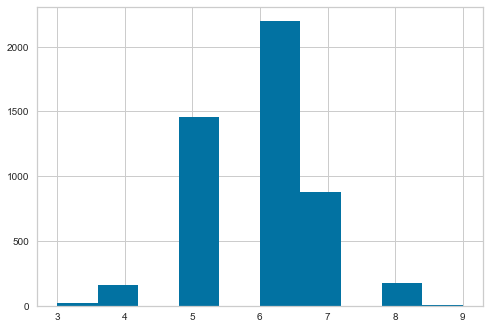

In [5]:
conditions = [
    (wine['quality'] <= 6),
    (wine['quality'] > 6) 
    ]
values = [0, 1]
wine['good_quality'] = np.select(conditions, values)
wine['quality'].hist()

wineY = wine['good_quality']
wineYmany = wine['quality']
wineX = wine.drop(columns=['good_quality','quality'])

In [6]:
spamX = spam.iloc[: , :-1]
spamY = spam.iloc[: , -1]

In [7]:
scaler = MinMaxScaler()
wineXScaled = scaler.fit_transform(wineX)
spamXScaled = scaler.fit_transform(spamX)

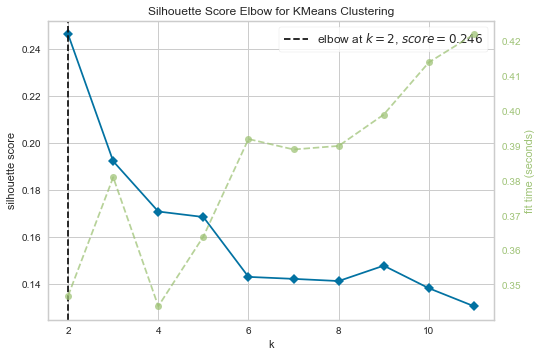

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [9]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='silhouette', timings=True
)

visualizer.fit(wineXScaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [127]:
X_train, X_test, y_train, y_test = train_test_split(wineXScaled, wineY, test_size=0.2)
start= time.time()
model = KMeans(n_clusters = 2)
a = model.fit(X_train)
train = accuracy_score(a.labels_, y_train)
b = model.predict(X_test)
test =  accuracy_score(b, y_test)
end= time.time()
print('Train Score: ', train)
print('Test Score: ', test)
print('Time to execute:', end -start)

Train Score:  0.666156202143951
Test Score:  0.6877551020408164
Time to execute: 0.3529989719390869


In [130]:
X_train, X_test, y_train, y_test = train_test_split(spamXScaled, spamY, test_size=0.2)
start= time.time()
model = KMeans(n_clusters = 2)
a = model.fit(X_train)
train = accuracy_score(a.labels_, y_train)
b = model.predict(X_test)
test =  accuracy_score(b, y_test)
print('Train Score: ', train)
print('Test Score: ', test)
end= time.time()
print('Time to execute:', end -start)

Train Score:  0.6008152173913044
Test Score:  0.5906623235613464
Time to execute: 0.37799668312072754


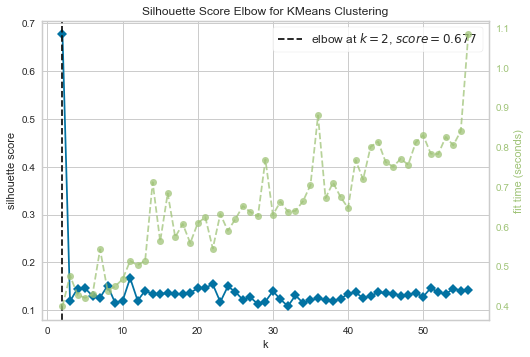

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [105]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,57), metric='silhouette', timings=True
)

visualizer.fit(spamXScaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

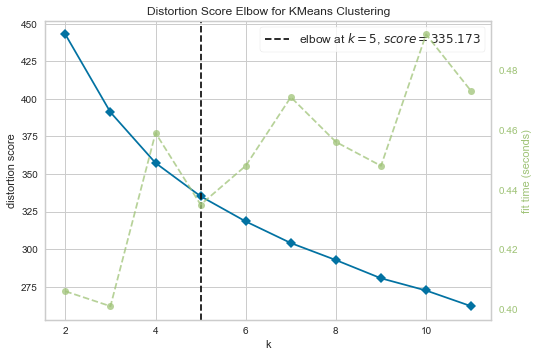

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [106]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='distortion'
)

visualizer.fit(wineXScaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

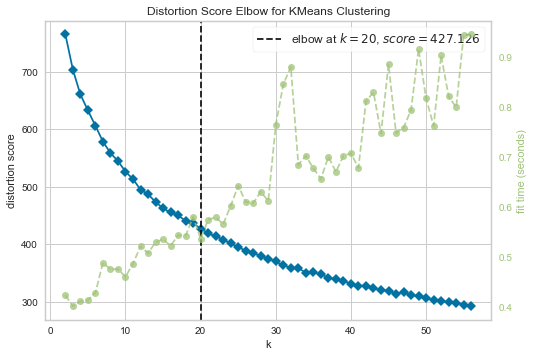

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [107]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,57), metric='distortion'
)

visualizer.fit(spamXScaled)        # Fit the data to the visualizer
visualizer.show()   

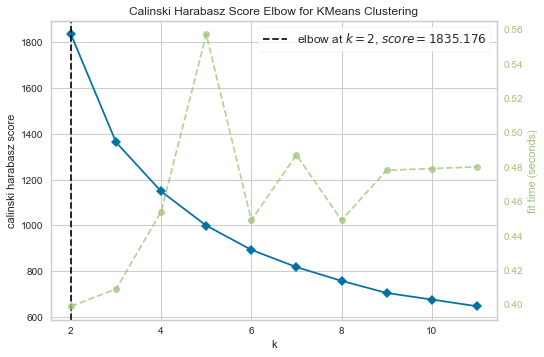

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [108]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz'
)

visualizer.fit(wineXScaled)        # Fit the data to the visualizer
visualizer.show()    

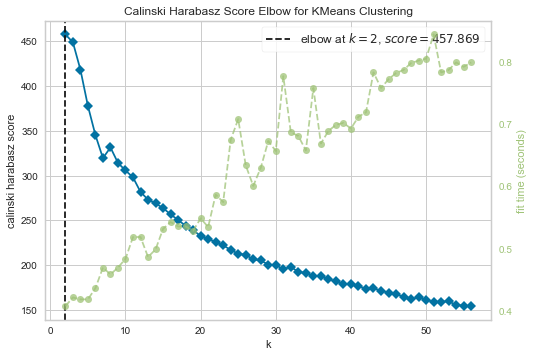

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [109]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,57), metric='calinski_harabasz'
)

visualizer.fit(spamXScaled)        # Fit the data to the visualizer
visualizer.show()   

C:\Users\Luan\AppData\Local\Temp/ipykernel_1792/795273050.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(2,12), S, 'bo-', color='black')


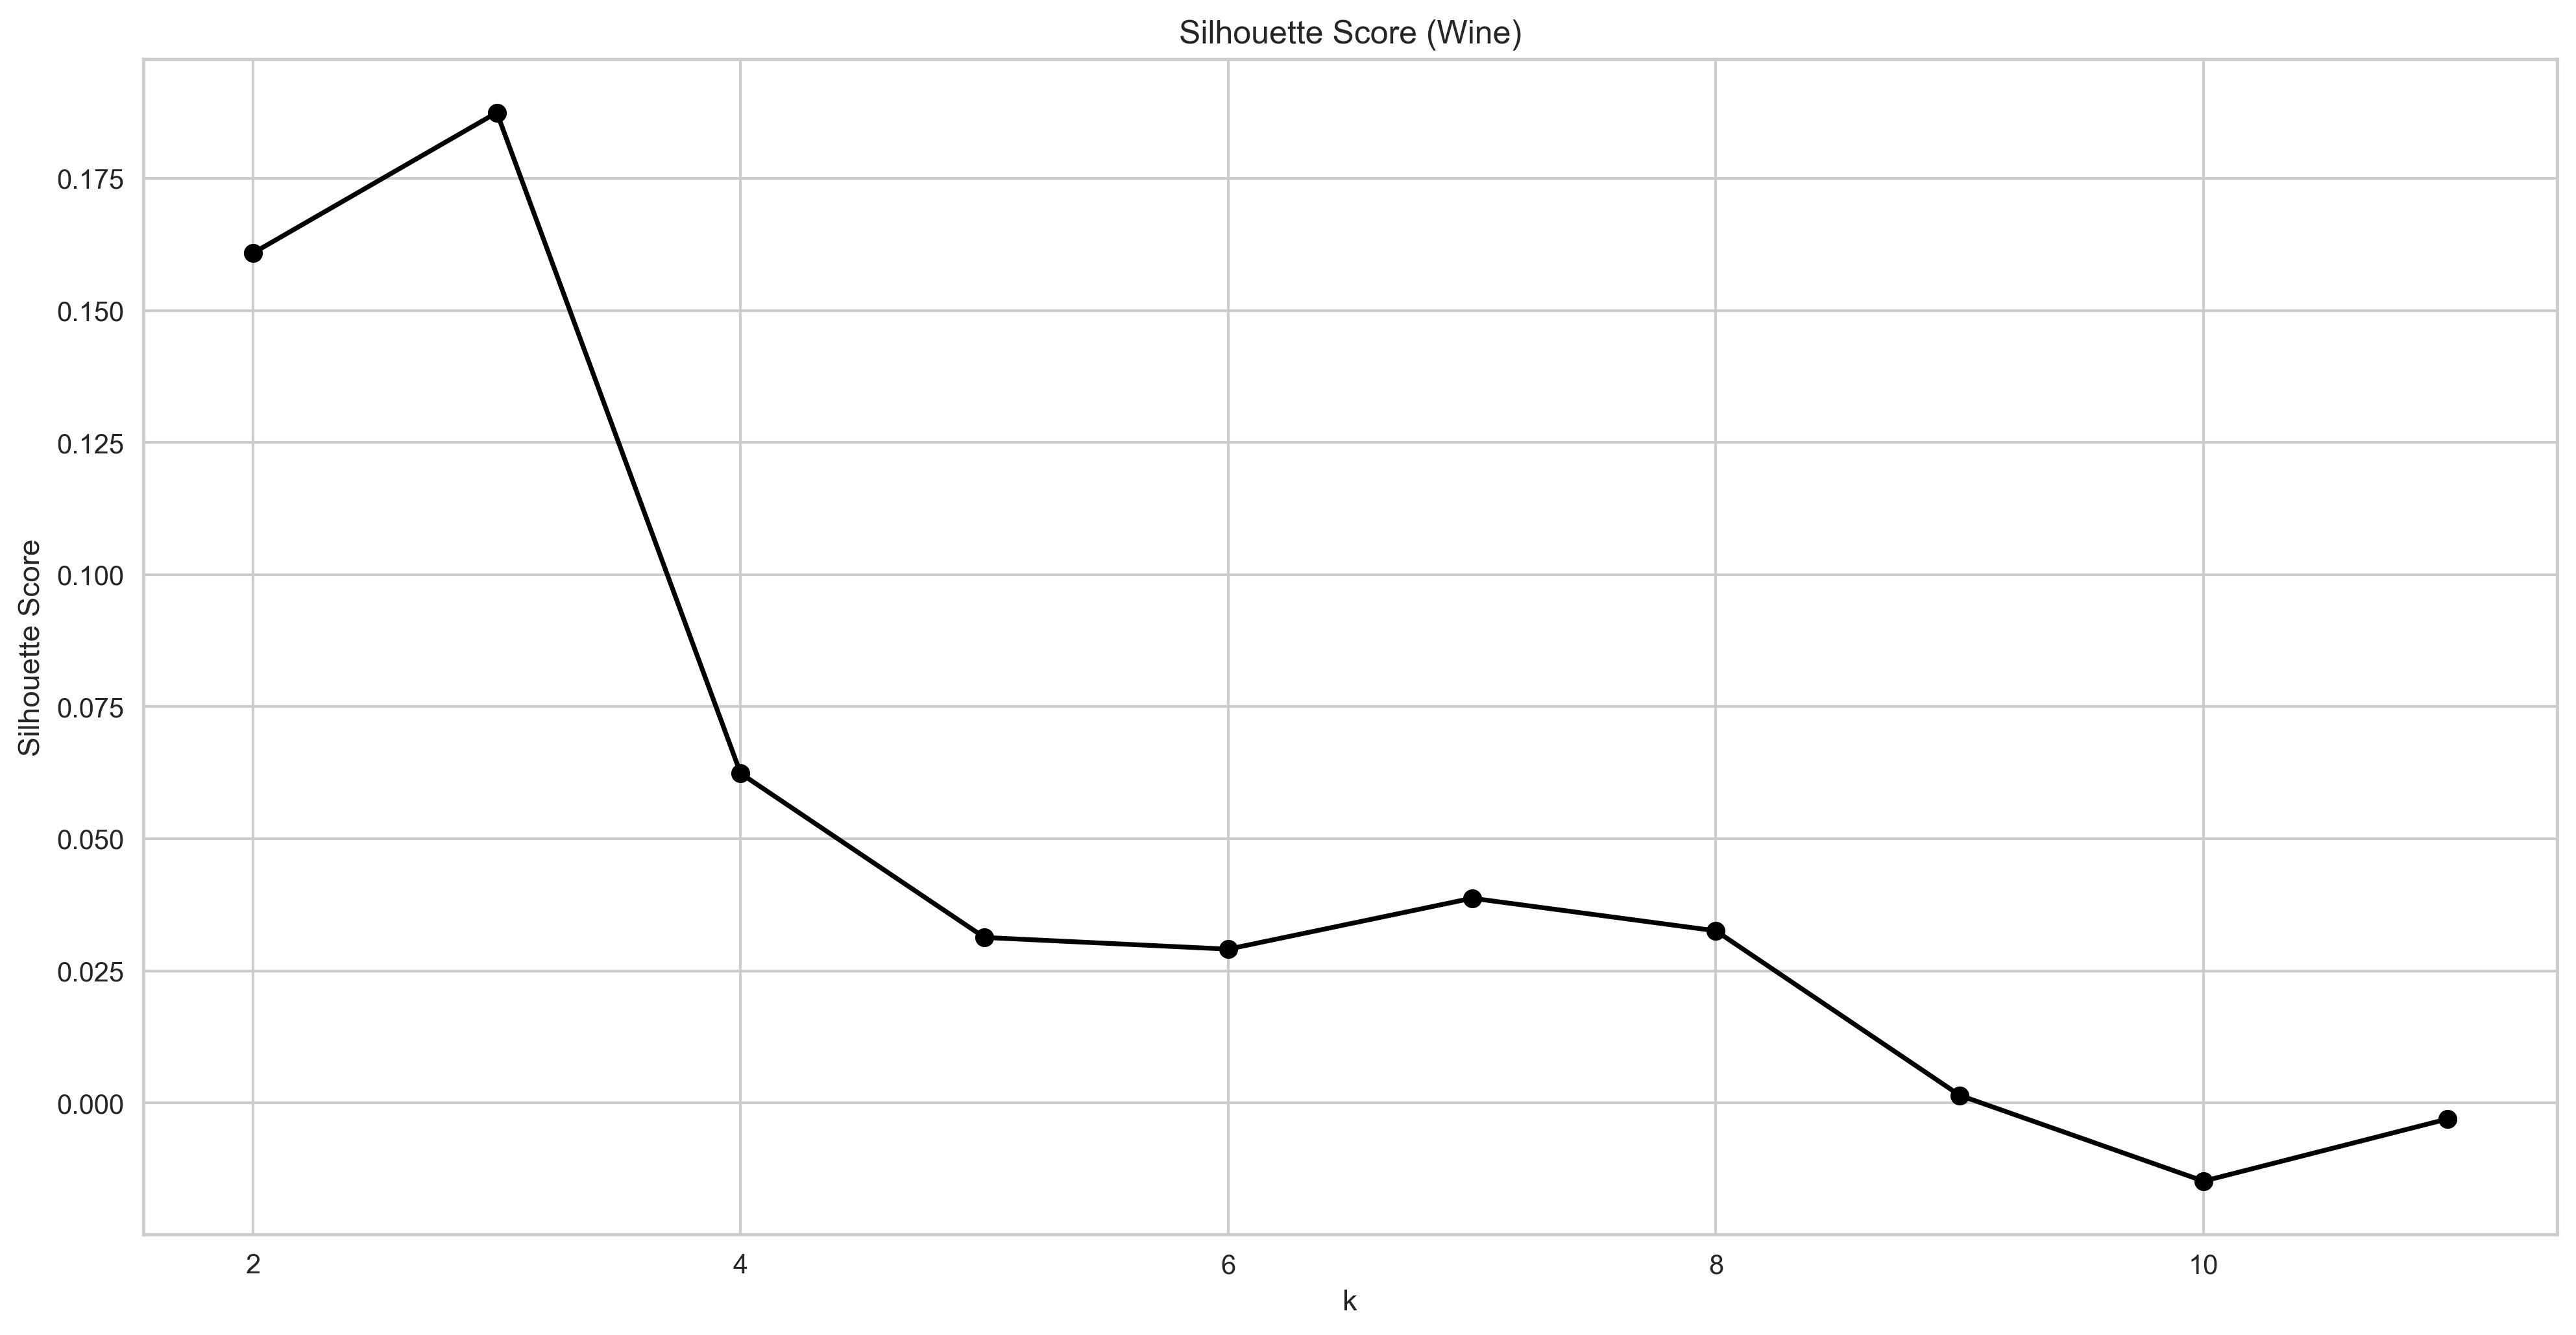

In [39]:
S=[]

for k in range(2,12):
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(wineXScaled)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(wineXScaled, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(range(2,12), S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score (Wine)')
plt.show()

In [132]:
X_train, X_test, y_train, y_test = train_test_split(wineXScaled, wineY, test_size=0.2)
start= time.time()
model = GaussianMixture(n_components=2, n_init=20, init_params='kmeans')

a =model.fit_predict(X_train)
b = model.predict(X_test)
train =  accuracy_score(a, y_train)
test =  accuracy_score(b, y_test)
print('Train Score: ', train)
print('Test Score: ', test)

end= time.time()
print('Time to execute:', end -start)

Train Score:  0.6837672281776417
Test Score:  0.6928571428571428
Time to execute: 1.366999626159668


In [133]:
X_train, X_test, y_train, y_test = train_test_split(spamXScaled, spamY, test_size=0.2)
start= time.time()
model = GaussianMixture(n_components=2, n_init=20, init_params='kmeans')

a =model.fit_predict(X_train)
b = model.predict(X_test)
train =  accuracy_score(a, y_train)
test =  accuracy_score(b, y_test)
print('Train Score: ', train)
print('Test Score: ', test)

end= time.time()
print('Time to execute:', end -start)

Train Score:  0.6855978260869565
Test Score:  0.6796959826275787
Time to execute: 3.2119972705841064


C:\Users\Luan\AppData\Local\Temp/ipykernel_1792/1240500481.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(2,20,2), S, 'bo-', color='black')


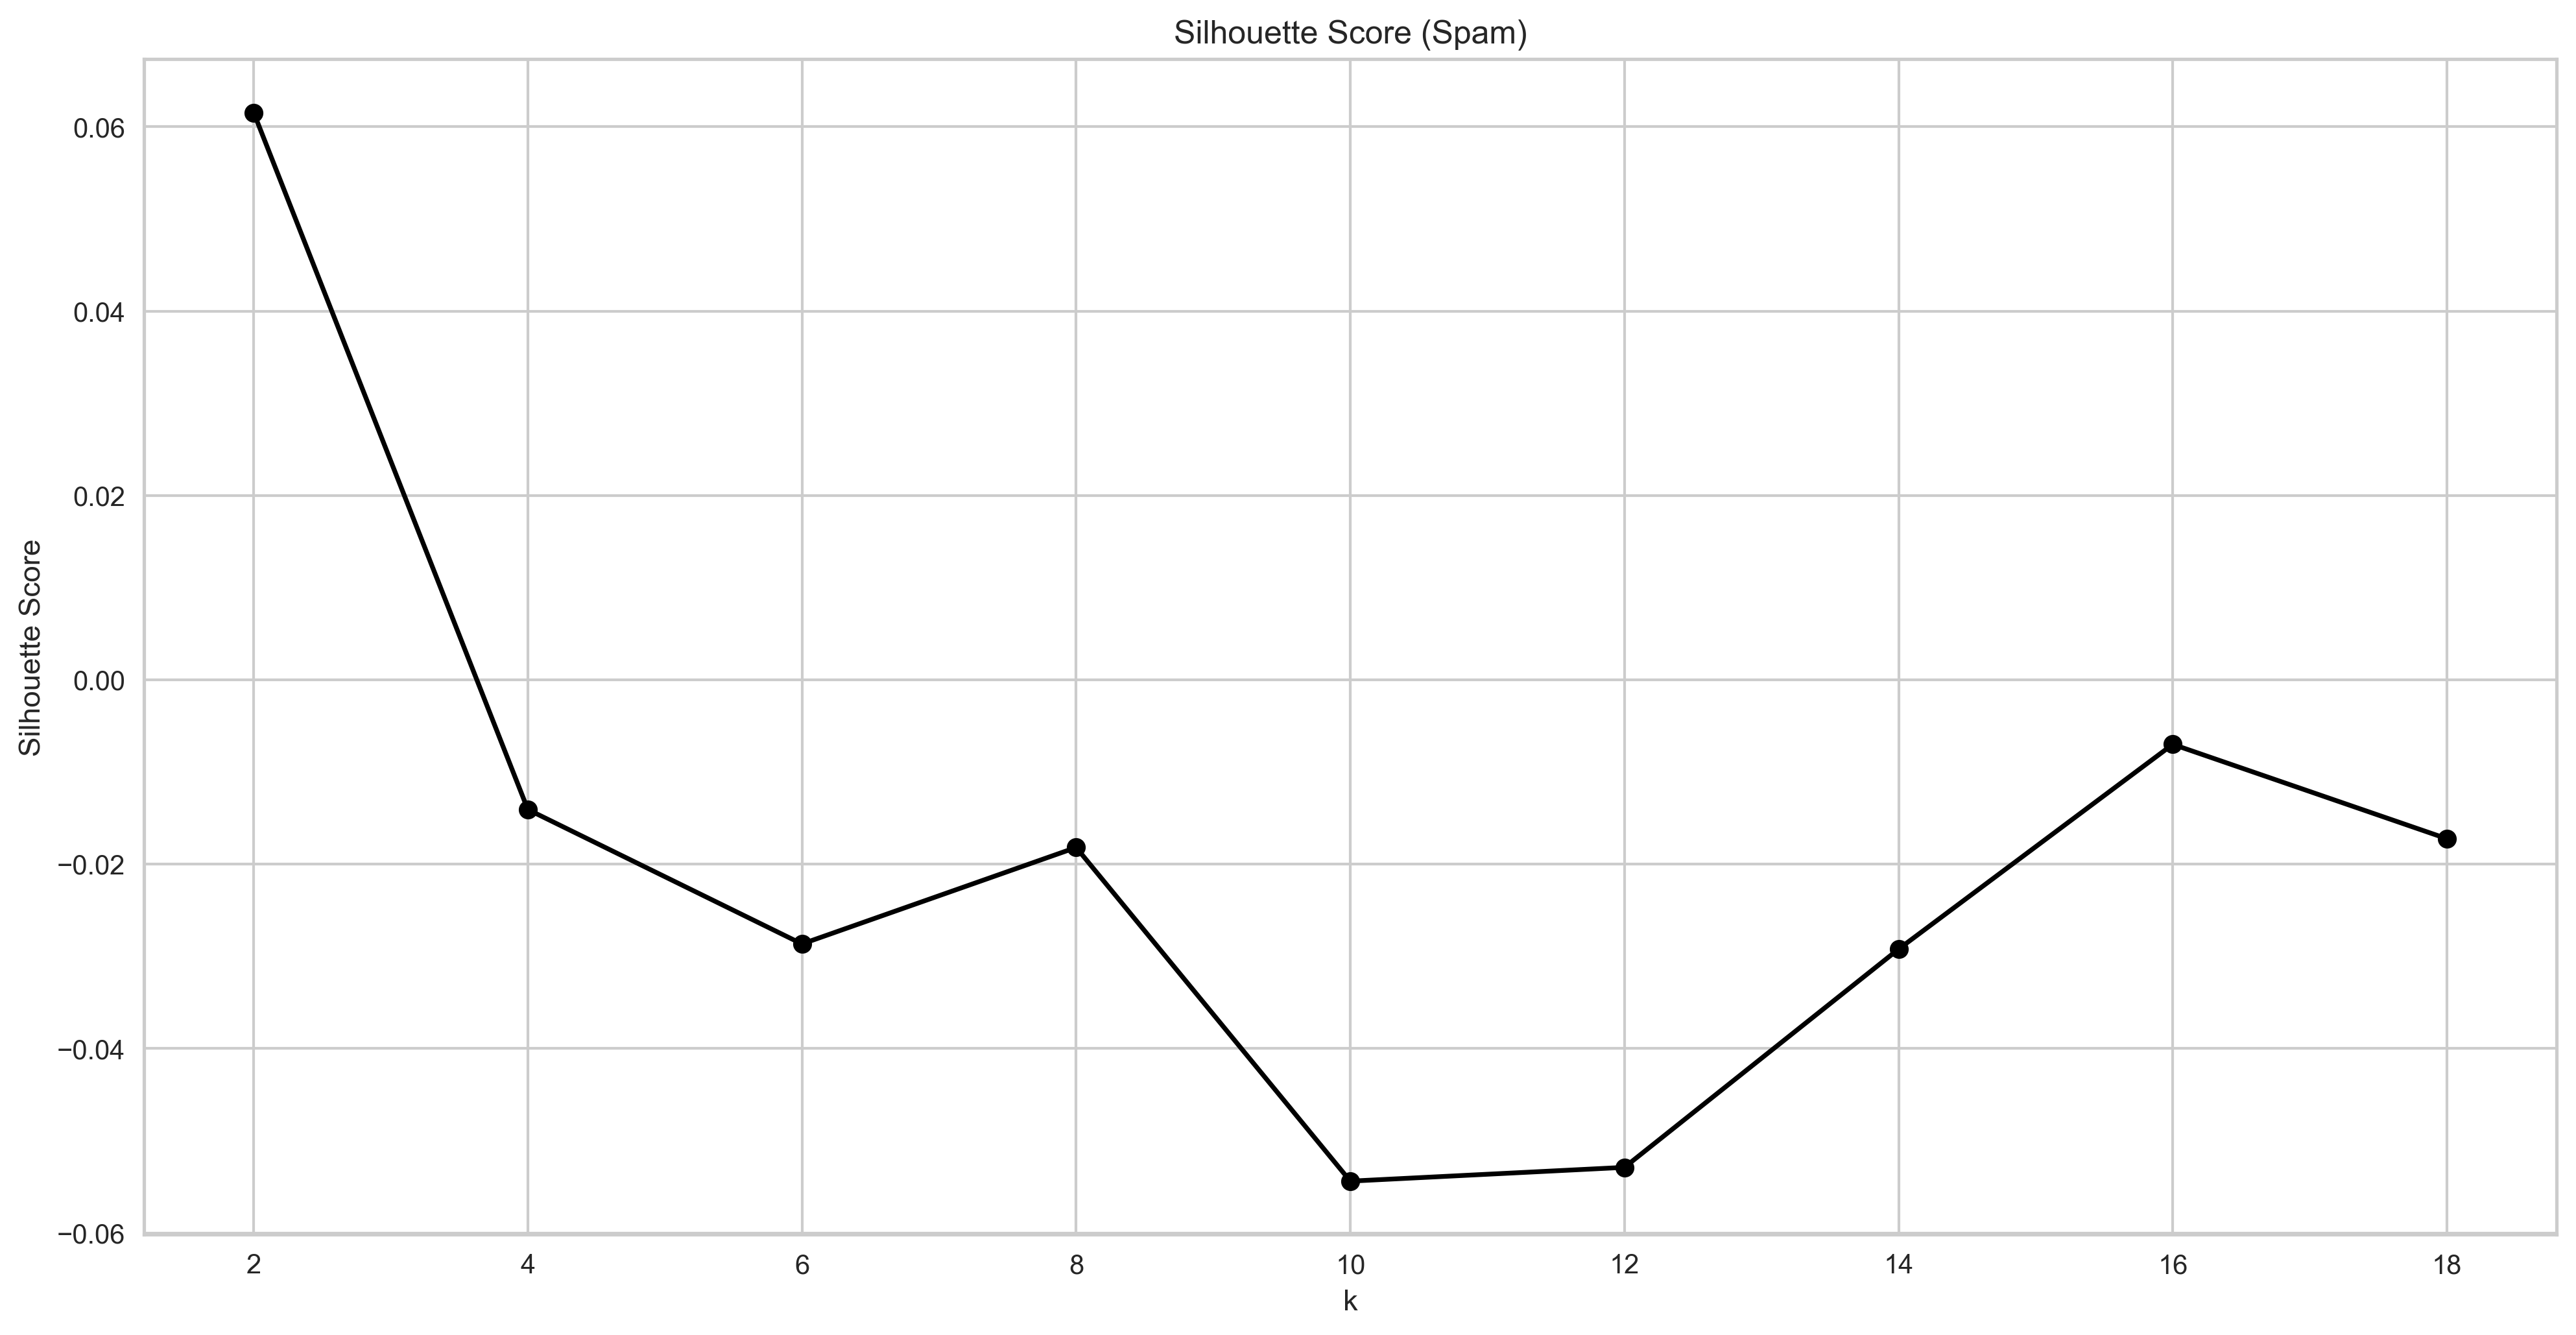

In [38]:
S=[]

for k in range(2,20,2):
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=5, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(spamXScaled)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(spamXScaled, labels, metric='euclidean'))
    print('done',k)

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(range(2,20,2), S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score (Spam)')
plt.show()

C:\Users\Luan\AppData\Local\Temp/ipykernel_1792/3719995015.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(2,40,5), S, 'bo-', color='black')


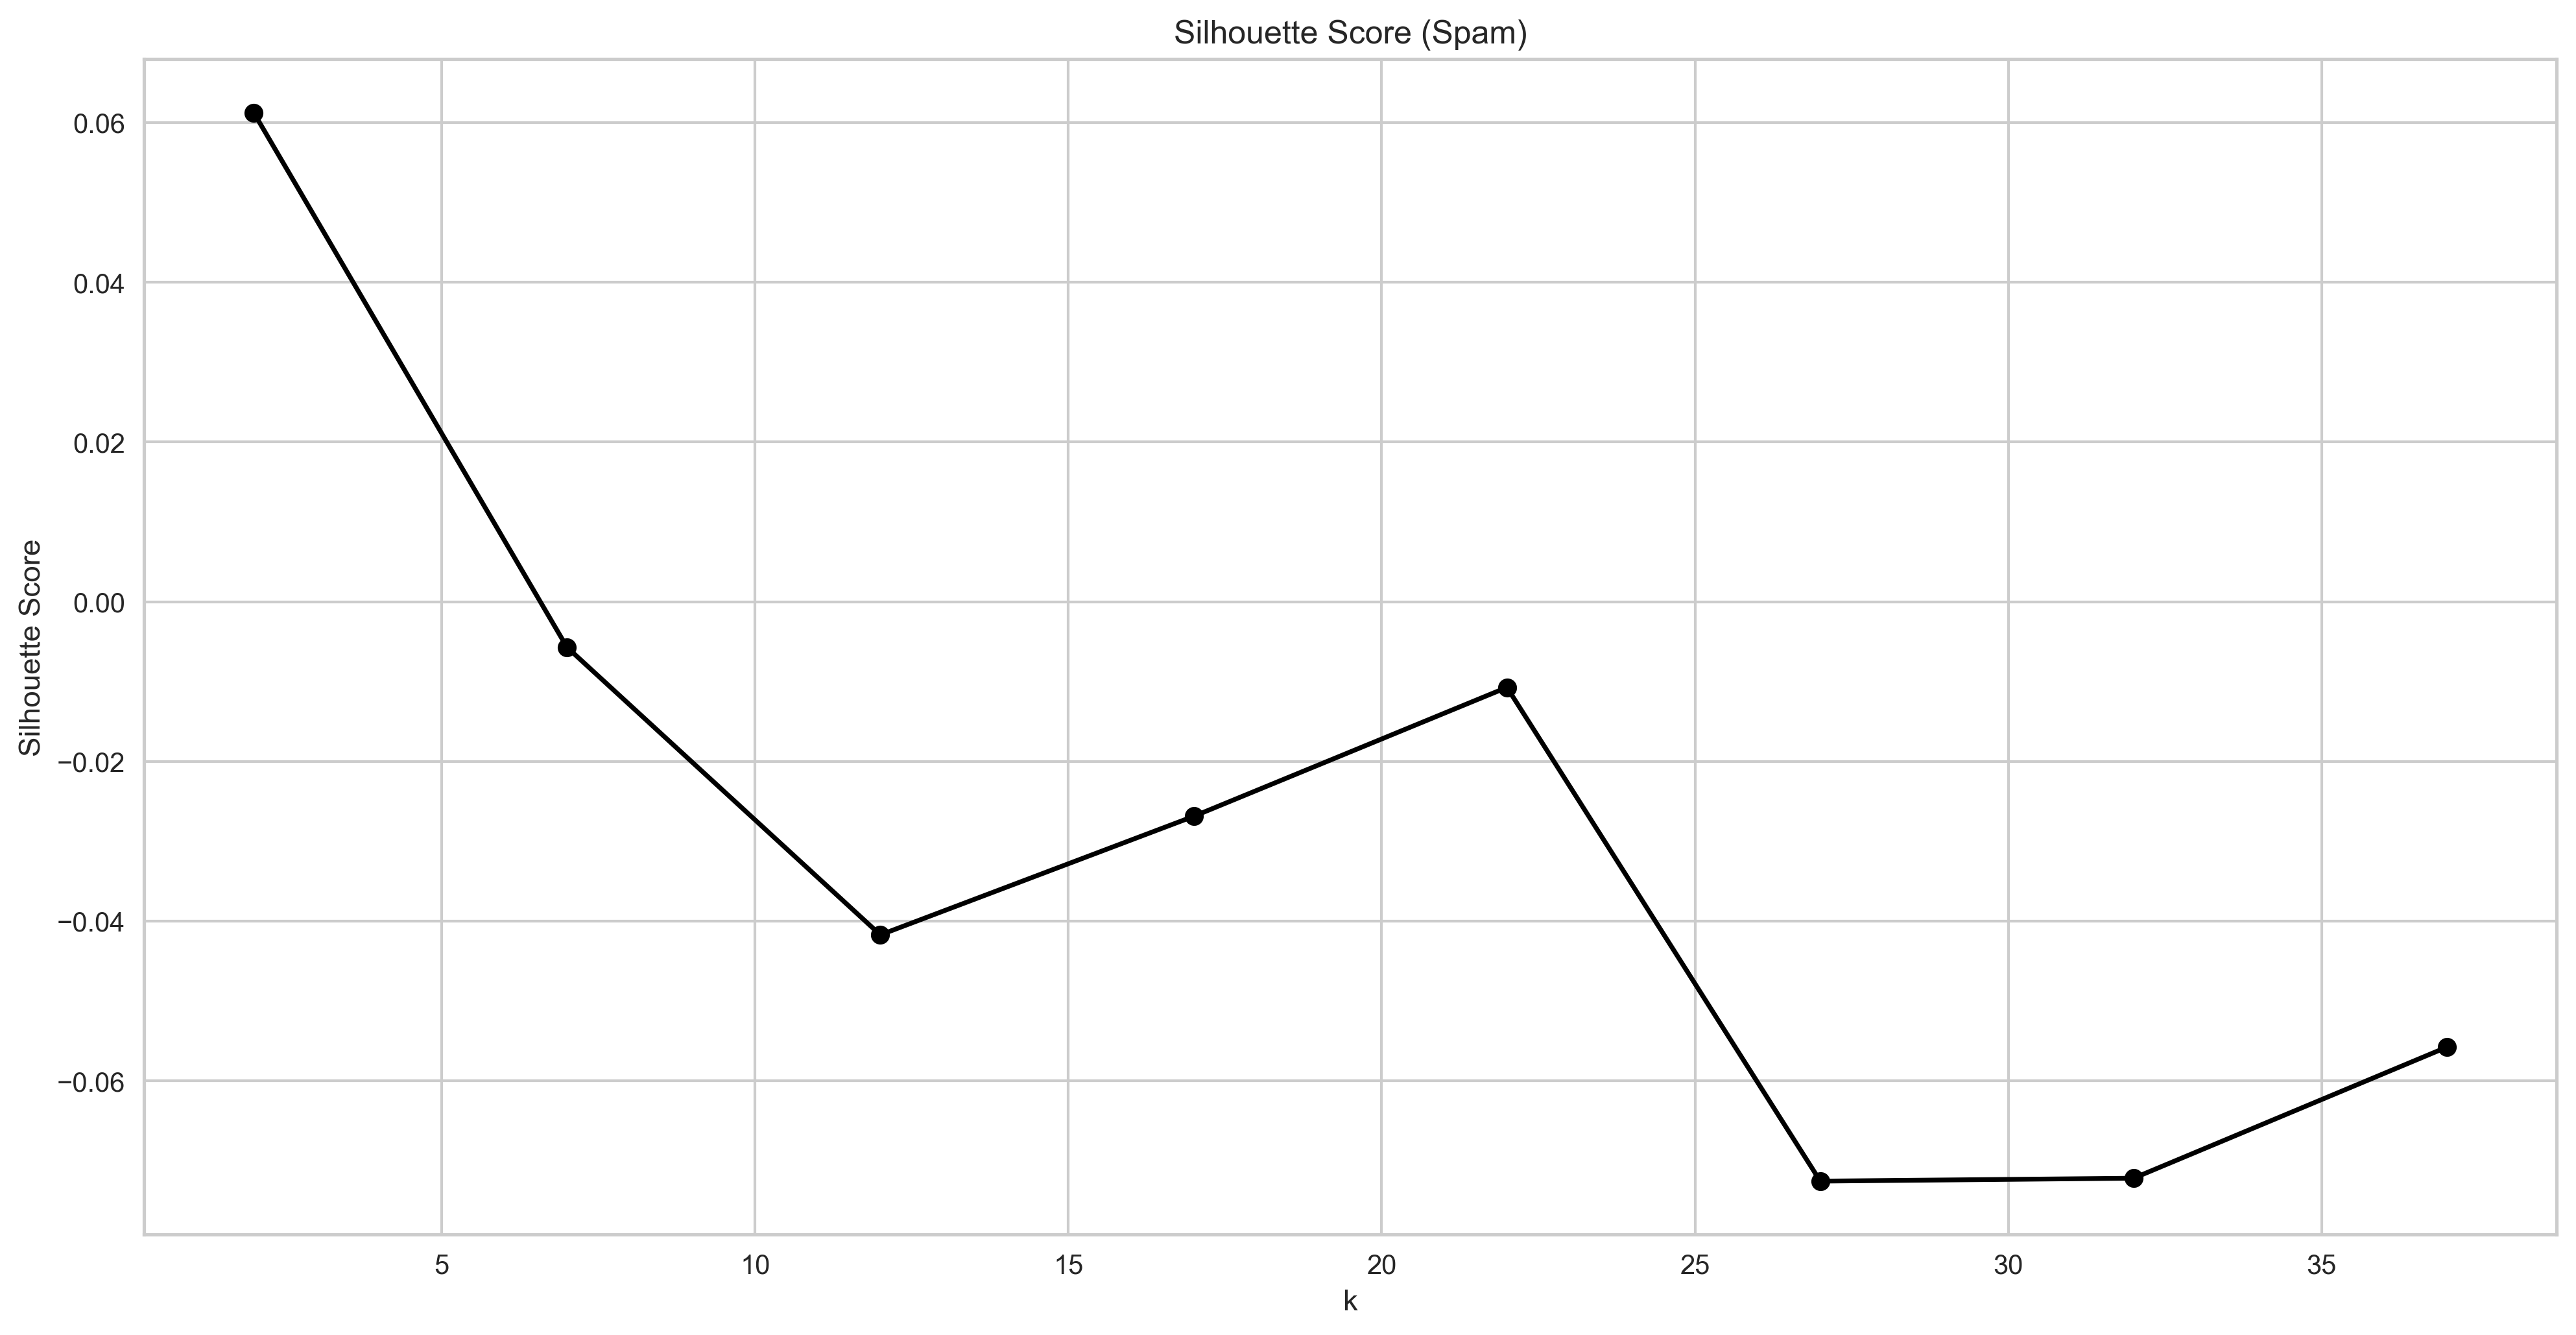

In [107]:
S=[]

for k in range(2,40,5):
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=5, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(spamXScaled)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(spamXScaled, labels, metric='euclidean'))
    print('done',k)

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(range(2,40,5), S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score (Spam)')
plt.show()

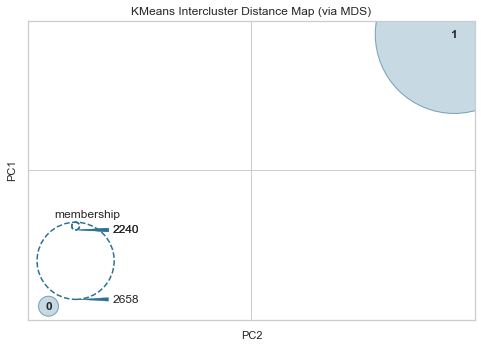

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [110]:
model = KMeans(2)
visualizer = InterclusterDistance(model)

visualizer.fit(wineXScaled)        # Fit the data to the visualizer
visualizer.show()  

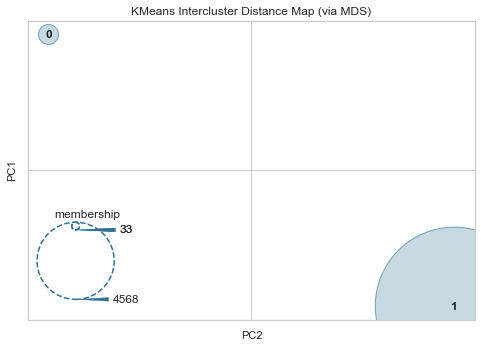

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [111]:
model = KMeans(2)
visualizer = InterclusterDistance(model)

visualizer.fit(spamXScaled)        # Fit the data to the visualizer
visualizer.show()  

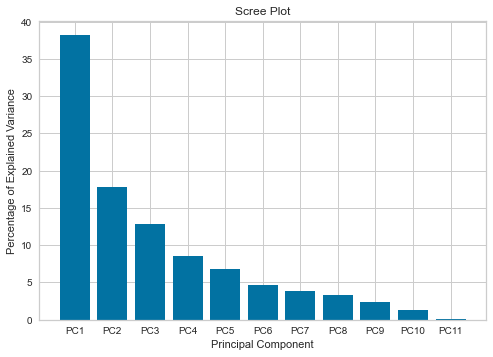

In [31]:
pca = PCA() # create a PCA object
pca.fit(wineXScaled) # do the math
pca_data = pca.transform(wineXScaled) # get PCA coordinates for scaled_data
 
#########################
#
# Draw a scree plot and a PCA plot
#
#########################
 
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [14]:
pca.explained_variance_ratio_

array([0.38165992, 0.17846312, 0.12895247, 0.08592807, 0.06842803,
       0.04595895, 0.03924179, 0.0332141 , 0.02432526, 0.01308555,
       0.00074274])

In [29]:
loading_scores = pd.Series(pca.components_[0], index=wineHeader[:-1])
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
sorted_loading_scores

alcohol                 0.890389
total sulfur dioxide    0.257382
density                 0.224840
residual sugar          0.201742
pH                      0.138936
chlorides               0.114127
free sulfur dioxide     0.093712
fixed acidity           0.074462
citric acid             0.046049
volatile acidity        0.022258
sulphates               0.020928
dtype: float64

In [28]:
loading_scores = pd.Series(pca.components_[1], index=wineHeader[:-1])
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
sorted_loading_scores

pH                      0.773832
sulphates               0.557302
fixed acidity           0.231288
total sulfur dioxide    0.132921
alcohol                 0.089032
citric acid             0.062494
free sulfur dioxide     0.054183
residual sugar          0.045994
volatile acidity        0.043414
density                 0.025827
chlorides               0.000940
dtype: float64

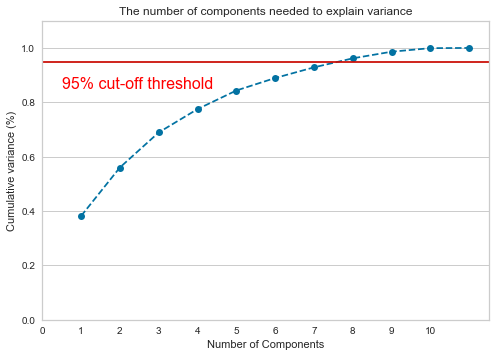

In [32]:
fig, ax = plt.subplots()
xi = np.arange(1, 12, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

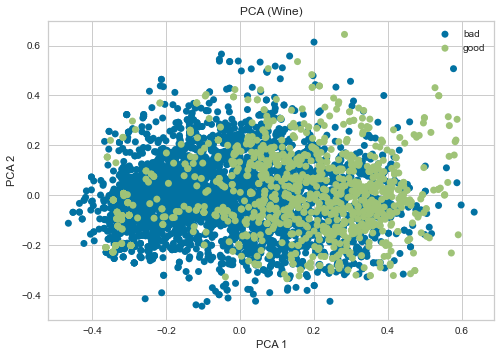

In [94]:

pca = PCA() # create a PCA object
pca.fit(wineXScaled) # do the math
pca_data = pca.transform(wineXScaled) # get PCA coordinates for scaled_data


plot = plt.scatter(pca_data[wineY==0,0], pca_data[wineY==0,1], edgecolor='none',label='bad')
plot = plt.scatter(pca_data[wineY==1,0], pca_data[wineY==1,1], edgecolor='none',label='good')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')   # relative to plt.rcParams['font.size']
plt.title('PCA (Wine)')
plt.legend()


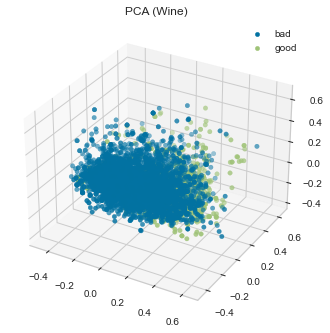

In [99]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot = ax.scatter(pca_data[wineY==0,0], pca_data[wineY==0,1],pca_data[wineY==0,2],label='bad')
plot = ax.scatter(pca_data[wineY==1,0], pca_data[wineY==1,1],pca_data[wineY==1,2], label='good')

plt.title('PCA (Wine)')
plt.legend()

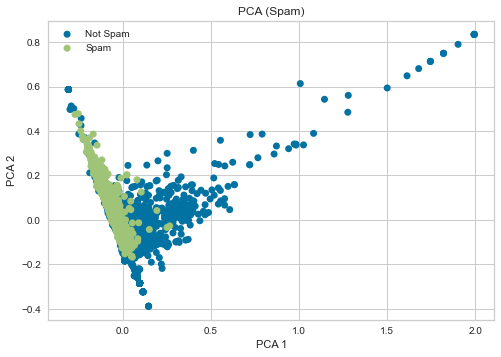

In [100]:

pca = PCA() # create a PCA object
pca.fit(spamXScaled) # do the math
pca_data = pca.transform(spamXScaled) # get PCA coordinates for scaled_data


plot = plt.scatter(pca_data[spamY==0,0], pca_data[spamY==0,1], edgecolor='none',label='Not Spam')
plot = plt.scatter(pca_data[spamY==1,0], pca_data[spamY==1,1], edgecolor='none',label='Spam')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')   # relative to plt.rcParams['font.size']
plt.title('PCA (Spam)')
plt.legend()


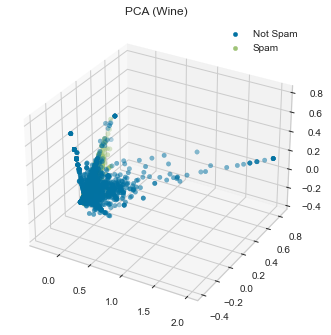

In [101]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot = ax.scatter(pca_data[spamY==0,0], pca_data[spamY==0,1],pca_data[spamY==0,2],label='Not Spam')
plot = ax.scatter(pca_data[spamY==1,0], pca_data[spamY==1,1],pca_data[spamY==1,2], label='Spam')

plt.title('PCA (Wine)')
plt.legend()

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [11] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [8] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [11] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


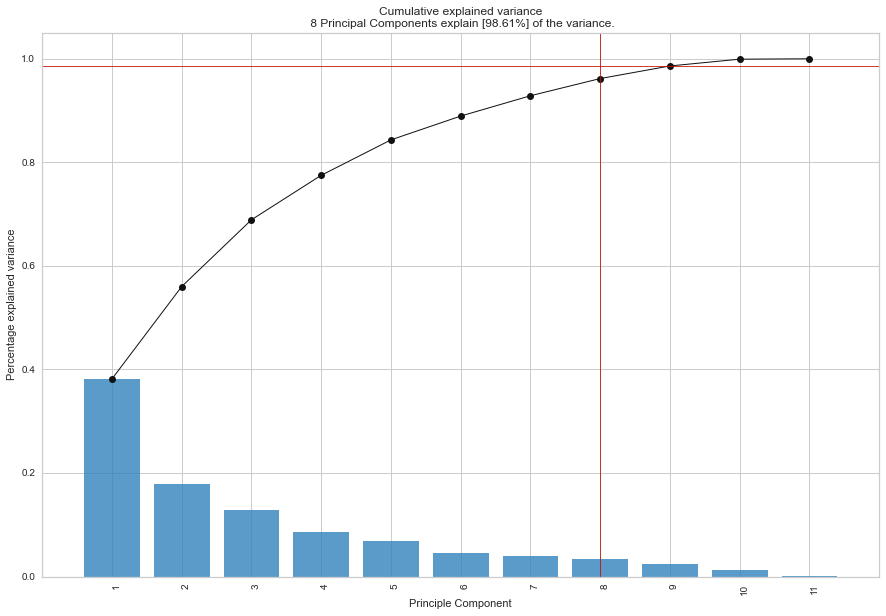

<Figure size 576x396 with 0 Axes>

In [136]:
#!pip install pca
from pca import pca

# Or reduce the data towards 2 PCs
model = pca(n_components=0.95)
# Or reduce the data towards 2 PCs
#model = pca(n_components=2)
# Fit transform
results = model.fit_transform(wineXScaled)
# Plot explained variance
fig, ax = model.plot()


[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [57] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [42] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [57] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[42]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


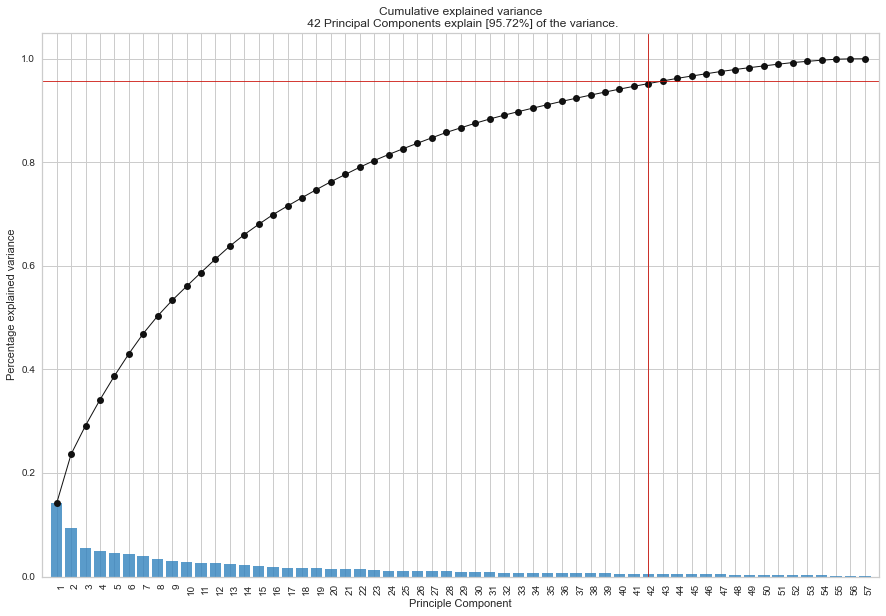

<Figure size 576x396 with 0 Axes>

In [137]:
#!pip install pca
from pca import pca

# Or reduce the data towards 2 PCs
model = pca(n_components=0.95)
# Or reduce the data towards 2 PCs
#model = pca(n_components=2)
# Fit transform
results = model.fit_transform(spamXScaled)
# Plot explained variance
fig, ax = model.plot()

In [119]:
pca = PCA() # create a PCA object
pca.fit(spamXScaled) # do the math
pca_data = pca.transform(spamXScaled) # get PCA coordinates for scaled_data


loading_scores = pd.Series(pca.components_[1], index=spamHeader[:-1])
sorted_loading_scores = loading_scores.sort_values(ascending=False)
sorted_loading_scores

your          0.574306
you           0.347112
all           0.276913
direct        0.231073
receive       0.222652
415           0.207959
857           0.207684
labs          0.178905
will          0.164389
make          0.137257
business      0.125109
technology    0.116200
000           0.114917
our           0.104188
650           0.100698
email         0.098887
order         0.083638
addresses     0.079545
telnet        0.076966
remove        0.071737
lab           0.061265
$             0.058929
over          0.055751
money         0.049304
people        0.046829
85            0.044860
mail          0.042258
internet      0.037879
free          0.033125
hp            0.031968
total         0.029892
credit        0.027858
hpl           0.025678
!             0.023767
longest       0.019247
(             0.015011
average       0.012480
report        0.011083
table         0.002547
#             0.001024
3d           -0.001381
parts        -0.002071
[            -0.011395
conference 

In [130]:
error

0.06311351753221094

In [132]:
np.mean(random_projection.components_ != 0)

0.3090909090909091

[Text(0.5, 0, '# Components'), Text(0, 0.5, 'Avg. Kurtosis')]

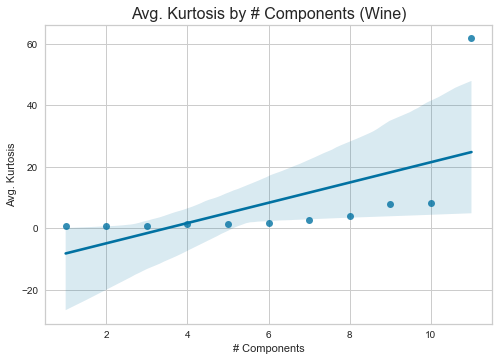

In [166]:
def generateGraphKurtosis(n, X):
    ica = FastICA(n_components=n, max_iter=500)
    S_ = ica.fit_transform(X)
    kurts = []
    for s in range(S_.shape[1]):
        kurts.append(kurtosis(S_[:,s]))


    
    A_ = ica.mixing_  # Get estimated mixing matrix
    rmse = mean_squared_error(X, np.dot(S_, A_.T) + ica.mean_, squared=False)

    return sum([abs(kurt) for kurt in kurts])/len(kurts), rmse

kurt_avgs = []
rmses = []
for i in range(1,12):
    res = generateGraphKurtosis(i, wineXScaled)
    kurt_avgs.append(res[0])
    rmses.append(res[1])
ax = sns.regplot(x=list(range(1,12)), y=kurt_avgs)
ax.set_title("Avg. Kurtosis by # Components (Wine)", fontsize=16)
ax.set(xlabel="# Components", ylabel="Avg. Kurtosis")


In [162]:
best_n = (0, 0)
for i in range(2, 12):
    ica = FastICA(n_components=i, max_iter=10000, tol=0.1).fit(wineXScaled)
    X_ica = ica.fit_transform(wineXScaled)  
    X_train, X_test, y_train, y_test = train_test_split(X_ica, wineY, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth = 26, min_samples_leaf = 3)
    cv_score = cross_val_score(clf, X_train, y_train, cv=20).mean()
    if (cv_score > best_n[1]):
        best_n = (i, cv_score)

clf = DecisionTreeClassifier(max_depth = 26, min_samples_leaf = 3)
print("Best n_components: " + str(best_n[0]))
ica = FastICA(n_components=int(best_n[0]), max_iter=10000, tol=0.1).fit(wineXScaled)
X_ica = ica.fit_transform(wineXScaled) 
X_train, X_test, y_train, y_test = train_test_split(X_ica, wineY, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

Best n_components: 11
Test Accuracy: 0.8285714285714286


[Text(0.5, 0, '# Components'), Text(0, 0.5, 'Avg. Kurtosis')]

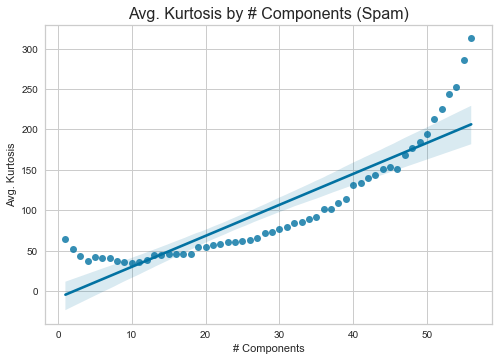

In [167]:
def generateGraphKurtosis(n, X):
    ica = FastICA(n_components=n, max_iter=500)
    S_ = ica.fit_transform(X)
    kurts = []
    for s in range(S_.shape[1]):
        kurts.append(kurtosis(S_[:,s]))


    
    A_ = ica.mixing_  # Get estimated mixing matrix
    rmse = mean_squared_error(X, np.dot(S_, A_.T) + ica.mean_, squared=False)

    return sum([abs(kurt) for kurt in kurts])/len(kurts), rmse

kurt_avgs = []
rmses = []
for i in range(1,57):
    res = generateGraphKurtosis(i, spamXScaled)
    kurt_avgs.append(res[0])
    rmses.append(res[1])
ax = sns.regplot(x=list(range(1,57)), y=kurt_avgs)
ax.set_title("Avg. Kurtosis by # Components (Spam)", fontsize=16)
ax.set(xlabel="# Components", ylabel="Avg. Kurtosis")


In [70]:
best_n = (0, 0)
for i in range(2, 57):
    ica = FastICA(n_components=i, max_iter=10000, tol=0.1).fit(spamXScaled)
    X_ica = ica.fit_transform(spamXScaled)  
    X_train, X_test, y_train, y_test = train_test_split(X_ica, spamY, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth = 26, min_samples_leaf = 3)
    cv_score = cross_val_score(clf, X_train, y_train, cv=20).mean()
    if (cv_score > best_n[1]):
        best_n = (i, cv_score)

clf = DecisionTreeClassifier(max_depth = 26, min_samples_leaf = 3)
print("Best n_components: " + str(best_n[0]))
ica = FastICA(n_components=int(best_n[0]), max_iter=10000, tol=0.1).fit(spamXScaled)
X_ica = ica.fit_transform(spamXScaled) 
X_train, X_test, y_train, y_test = train_test_split(X_ica, spamY, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

Best n_components: 26
Test Accuracy: 0.8631921824104235


In [40]:
# data has this shape:  row, col = 4898, 11 
random_projection = SparseRandomProjection(n_components=5)

random_projection.fit(wineXScaled)
components =  random_projection.components_.toarray() # shape=(5, 11) 
p_inverse = np.linalg.pinv(components.T) # shape=(5, 11) 

#now get the transformed data using the projection components
reduced_data = random_projection.transform(wineXScaled) #shape=(4898, 5) 
reconstructed= reduced_data.dot(p_inverse)  #shape=(4898, 11) 

error = mean_squared_error(wineXScaled, reconstructed)

In [51]:
best_n = (0, 0)
for i in range(2, 12):
    rp = SparseRandomProjection(n_components=i, random_state=42).fit(wineXScaled)
    X_rp = rp.fit_transform(wineXScaled)  
    X_train, X_test, y_train, y_test = train_test_split(X_rp, wineY, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth = 26, min_samples_leaf = 3)
    cv_score = cross_val_score(clf, X_train, y_train, cv=20).mean()
    if (cv_score > best_n[1]):
        best_n = (i, cv_score)

print("Best n_components: " + str(best_n[0]))
rp = SparseRandomProjection(n_components=best_n[0], random_state=42).fit(wineXScaled)
X_rp = rp.fit_transform(wineXScaled)  
X_train, X_test, y_train, y_test = train_test_split(X_rp, wineY, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

Best n_components: 9
Test Accuracy: 0.826530612244898


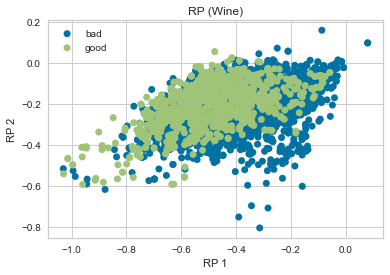

In [56]:
n = 9
rp = SparseRandomProjection(n_components=n)
X_rp=rp.fit_transform(wineXScaled)

plt.figure(figsize=(6,4))
plt.title('RP Components')

for i in range(0, n):
    for j in range(0, n):
        if i == j:
            continue
plot = plt.scatter(X_rp[wineY==0,0], X_rp[wineY==0,1], edgecolor='none',label='bad')
plot = plt.scatter(X_rp[wineY==1,0], X_rp[wineY==1,1], edgecolor='none',label='good')
plt.xlabel('RP 1')
plt.ylabel('RP 2')   # relative to plt.rcParams['font.size']
plt.title('RP (Wine)')
plt.legend()


In [71]:
best_n = (0, 0)
for i in range(2, 25):
    rp = SparseRandomProjection(n_components=i, random_state=42).fit(spamXScaled)
    X_rp = rp.fit_transform(spamXScaled)  
    X_train, X_test, y_train, y_test = train_test_split(X_rp, spamY, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth = 26, min_samples_leaf = 3)
    cv_score = cross_val_score(clf, X_train, y_train, cv=20).mean()
    if (cv_score > best_n[1]):
        best_n = (i, cv_score)

print("Best n_components: " + str(best_n[0]))
rp = SparseRandomProjection(n_components=best_n[0], random_state=42).fit(spamXScaled)
X_rp = rp.fit_transform(spamXScaled)  
X_train, X_test, y_train, y_test = train_test_split(X_rp, spamY, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

Best n_components: 19
Test Accuracy: 0.8621064060803475


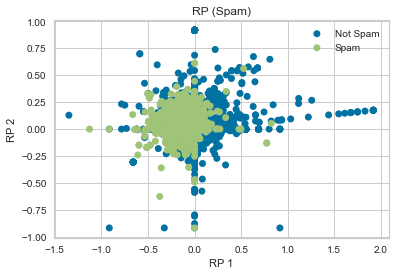

In [66]:
n = 9
rp = SparseRandomProjection(n_components=n)
X_rp=rp.fit_transform(spamXScaled)

plt.figure(figsize=(6,4))
plt.title('RP Components')

for i in range(0, n):
    for j in range(0, n):
        if i == j:
            continue
plot = plt.scatter(X_rp[spamY==0,0], X_rp[spamY==0,1], edgecolor='none',label='Not Spam')
plot = plt.scatter(X_rp[spamY==1,0], X_rp[spamY==1,1], edgecolor='none',label='Spam')
plt.xlabel('RP 1')
plt.ylabel('RP 2')   # relative to plt.rcParams['font.size']
plt.title('RP (Spam)')
plt.legend()

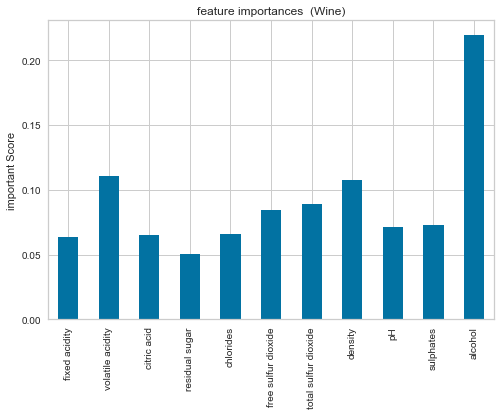

In [142]:
X_train, X_test, y_train, y_test = train_test_split(wineXScaled, wineY, test_size=0.25)
winecfl =DecisionTreeClassifier(ccp_alpha=0.0002, criterion='entropy', max_depth=15,
                       min_samples_leaf=2)
winecfl.fit(X_train,y_train)
winecfl.feature_importances_ 

wineSel = pd.Series(winecfl.feature_importances_, index=wineHeader[:-1])
plt.figure()
wineSel.plot.bar()
plt.ylabel('important Score')
plt.title('feature importances  (Wine)')
plt.show()


In [144]:
wineSel.sort_values(ascending=False)

alcohol                 0.219868
volatile acidity        0.110564
density                 0.107286
total sulfur dioxide    0.089265
free sulfur dioxide     0.084283
sulphates               0.073021
pH                      0.071062
chlorides               0.065510
citric acid             0.064839
fixed acidity           0.063747
residual sugar          0.050555
dtype: float64

In [151]:
copy =wineX 
wineDrop = copy.drop(columns=['residual sugar','fixed acidity'])

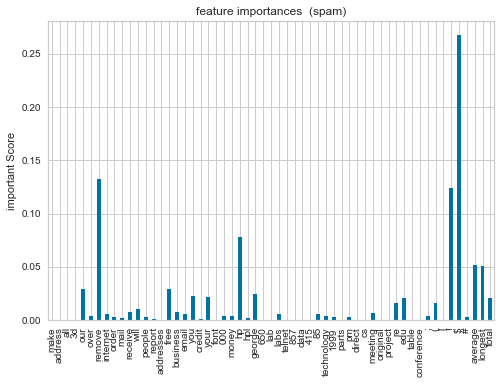

In [164]:
X_train, X_test, y_train, y_test = train_test_split(spamXScaled, spamY, test_size=0.25)
spamcfl =DecisionTreeClassifier(ccp_alpha=0.0002, criterion='entropy', max_depth=15,
                       min_samples_leaf=2)
spamcfl.fit(X_train,y_train)
spamcfl.feature_importances_ 

spamSel = pd.Series(spamcfl.feature_importances_, index=spamHeader[:-1])
plt.figure()
x.plot.bar()
plt.ylabel('important Score')
plt.title('feature importances  (spam)')
plt.show()


In [165]:
spamSel.sort_values(ascending=False)
spamSel.value_counts()

0.000000    21
0.000390     1
0.031897     1
0.002264     1
0.031187     1
0.018042     1
0.001551     1
0.004042     1
0.008254     1
0.010281     1
0.002450     1
0.034907     1
0.011023     1
0.293212     1
0.036191     1
0.002402     1
0.109504     1
0.024174     1
0.061097     1
0.003386     1
0.001280     1
0.009839     1
0.004141     1
0.017027     1
0.003776     1
0.120659     1
0.018948     1
0.004681     1
0.010767     1
0.024602     1
0.021531     1
0.002931     1
0.029209     1
0.010656     1
0.003037     1
0.009968     1
0.020696     1
dtype: int64

In [167]:
spamSel = spamSel[spamSel!=0]

copy =spamX 
spamDrop = copy.drop(columns=spamSel.index)
spamDrop

,3d,report,addresses,credit,font,lab,labs,857,415,85,...,1999,parts,pm,direct,cs,original,project,table,conference,[
0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0
1,0.0,0.21,0.14,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.07,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0
2,0.0,0.00,1.75,0.32,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.06,0.0,0.12,0.00,0.0,0.0,0.0
3,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0
4,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.00,0.0,0.00,0.31,0.0,0.0,0.0
4597,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0
4598,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0
4599,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.00,0.0,0.00,0.32,0.0,0.0,0.0


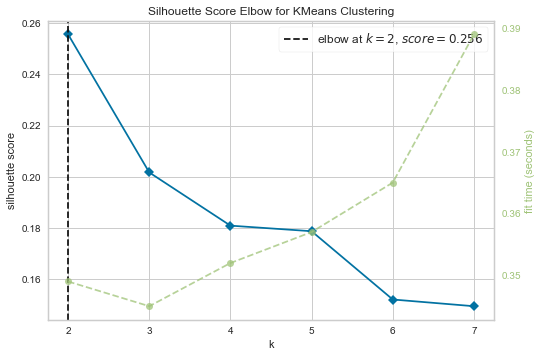

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [92]:
pca = PCA(n_components= 8).fit(wineXScaled)
X_pca = pca.transform(wineXScaled)

model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,8), metric='silhouette', timings=True
)

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

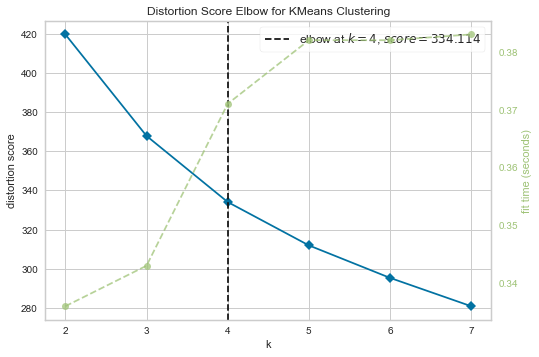

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [93]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,8), metric='distortion', timings=True
)

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

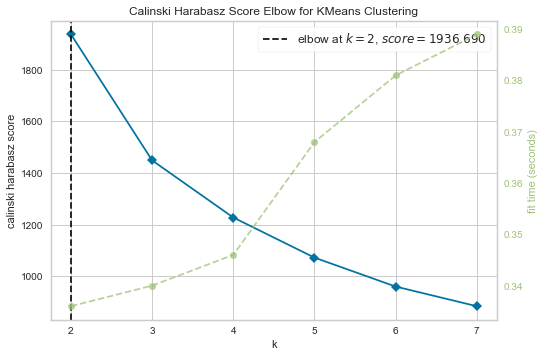

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [94]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,8), metric='calinski_harabasz', timings=True
)

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


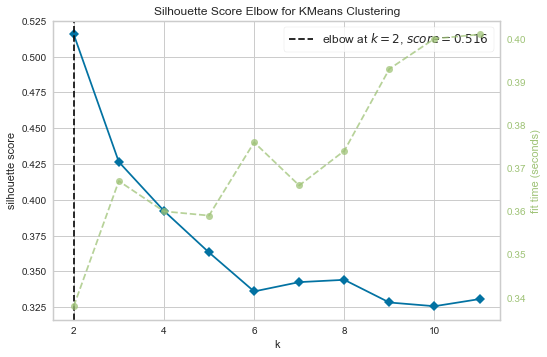

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [160]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='silhouette', timings=True
)

visualizer.fit(wineDrop)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


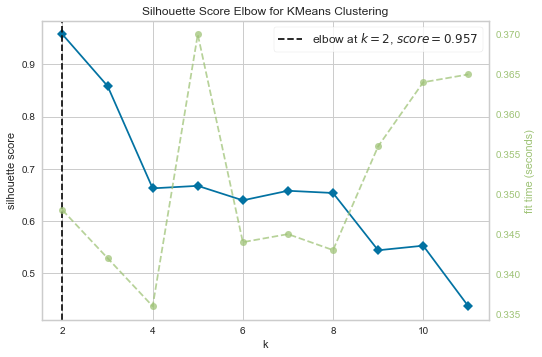

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [161]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='silhouette', timings=True
)

visualizer.fit(spamDrop)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(spamDrop, spamY, test_size=0.2)
start= time.time()
model = KMeans(n_clusters = 2)
a = model.fit(X_train)
train = accuracy_score(a.labels_, y_train)
b = model.predict(X_test)
test =  accuracy_score(b, y_test)
end= time.time()
print('Train Score: ', train)
print('Test Score: ', test)
print('Time to execute:', end -start)

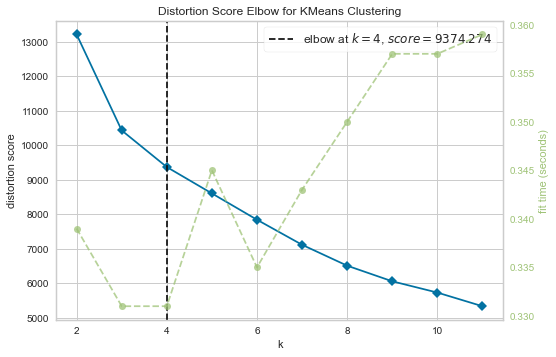

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [163]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='distortion', timings=True
)

visualizer.fit(spamDrop)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


In [ ]:
model = KMeans(2)
visualizer = InterclusterDistance(model)

visualizer.fit(spamDrop)        # Fit the data to the visualizer
visualizer.show()  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(spamDrop, spamY, test_size=0.25)
clf = DecisionTreeClassifier(max_depth = 26, min_samples_leaf = 3)
a = model.fit(X_train)
train = accuracy_score(a.labels_, y_train)
b = model.predict(X_test)
test =  accuracy_score(b, y_test)
end= time.time()
print('Train Score: ', train)
print('Test Score: ', test)
print('Time to execute:', end -start)

In [ ]:
pca = PCA(n_components= 42).fit(spamXScaled)
X_pca = pca.transform(spamXScaled)

model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,42), metric='silhouette', timings=True
)

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure